In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [4]:
base = pd.read_csv('credit.csv', sep=',')
base.shape

(1000, 21)

In [12]:
base.head()

,duration,credit_history,purpose,credit_amount,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,6,'critical/other existing credit',radio/tv,1169,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,48,'existing paid',radio/tv,5951,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,12,'critical/other existing credit',education,2096,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,42,'existing paid',furniture/equipment,7882,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,24,'delayed previously','new car',4870,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [15]:
base = base.drop(['class'], axis = 1)
base = base.drop(['credit_history'], axis = 1)
base = base.drop(['duration'], axis = 1)
base.head()


,credit_amount,age
0,1169,67
1,5951,22
2,2096,49
3,7882,45
4,4870,53


In [20]:
df = pd.DataFrame(base)
mean_df = df['age'].mean()
print(mean_df)

35.546


In [21]:
df = pd.DataFrame(base)
mean_df = df['credit_amount'].mean()
print(mean_df)

3271.258


In [22]:
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values 
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.03271642],
       [0.03271642, 1.        ]])

In [23]:
X = X.reshape(-1, 1)

In [24]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [25]:
modelo.intercept_

2982.6837543885413

In [26]:
modelo.coef_

array([8.11833246])

In [27]:
modelo.score(X, y)

0.0010703639194271641

In [33]:
previsoes_x = modelo.predict(X)
previsoes_x


array([3526.61202919, 3161.2870685 , 3380.48204491, 3348.00871507,
       3412.95537475, 3266.82539048, 3412.95537475, 3266.82539048,
       3477.90203443, 3209.99706326, 3185.64206588, 3177.52373342,
       3161.2870685 , 3469.78370197, 3209.99706326, 3242.4703931 ,
       3412.95537475, 3185.64206588, 3339.89038261, 3234.35206064,
       3372.36371245, 3339.89038261, 3372.36371245, 3339.89038261,
       3193.76039834, 3274.94372294, 3299.29872032, 3323.65371769,
       3258.70705802, 3494.13869935, 3274.94372294, 3201.8787308 ,
       3226.23372818, 3445.42870459, 3250.58872556, 3185.64206588,
       3234.35206064, 3283.0620554 , 3283.0620554 , 3177.52373342,
       3226.23372818, 3193.76039834, 3339.89038261, 3177.52373342,
       3453.54703705, 3266.82539048, 3299.29872032, 3169.40540096,
       3299.29872032, 3209.99706326, 3218.11539572, 3226.23372818,
       3185.64206588, 3234.35206064, 3445.42870459, 3193.76039834,
       3404.83704229, 3234.35206064, 3169.40540096, 3169.40540

In [37]:
modelo_ajustado = sm.ols(formula = 'age ~ credit_amount', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.069
Date:                Fri, 15 Oct 2021   Prob (F-statistic):              0.301
Time:                        16:54:21   Log-Likelihood:                -3849.4
No. Observations:                1000   AIC:                             7703.
Df Residuals:                     998   BIC:                             7713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.1147      0.551     63.756      0.000      34.034      36.195
credit_amount     0.0001      0.000      1.034      0.301      -0.000       0.000
==============================================================================
Omnibus:                      134.380   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.396
Skew:                           1.022   Prob(JB):                     1.23e-41
Kurtosis:                       3.588   Cond. No.                     6.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

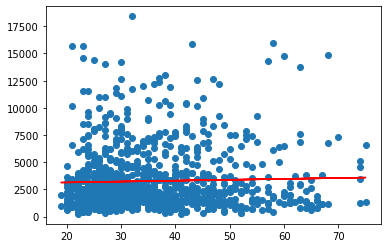

In [39]:
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')

In [41]:
modelo.predict([[500]])

array([7041.84998422])